Prerecorded data loaded successfully.
Form filled with: 
Training path: //10.99.68.52/Kiemendata/Valentina Matos/Jaime/annotate
Testing path: //10.99.68.52/Kiemendata/Valentina Matos/Jaime/annotate/test
Model name: 12_14_2024
Resolution: Custom
Updated Raw DataFrame from tab 2:
      Layer Name            Color Whitespace Settings  Delete layer  \
0          bones  (250, 236, 154)                   2         False   
1           lung     (0, 255, 64)                   2         False   
2   lung_vessels    (255, 128, 0)                   2         False   
3  heart_vessels      (255, 0, 0)                   2         False   
4            ecm  (255, 128, 192)                   2         False   
5          heart  (255, 255, 255)                   2         False   
6      nontissue    (0, 255, 255)                   2         False   

   Combined layers  Nesting  Component analysis  
0                1        1               False  
1                2        2               False  
2 

0

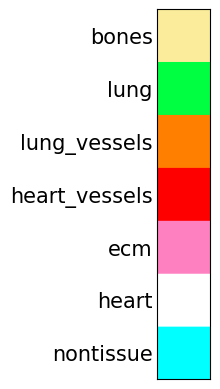

In [1]:
import os.path
import shutil
import pickle
from tkinter import image_names

from base.CODAGUI_fend import MainWindow
import sys
from PySide6 import QtWidgets
from base.classify_im_fend import MainWindowClassify
from base import CODA
from base import *

# 1 Execute the GUI
app = QtWidgets.QApplication.instance()
if app is None:
    app = QtWidgets.QApplication(sys.argv)

# Load and apply the dark theme stylesheet
current_dir = os.getcwd()
with open(os.path.join(current_dir,'base','dark_theme.qss'), 'r') as file:
    app.setStyleSheet(file.read())

window = MainWindow()
window.show()
app.exec()

In [2]:
if window.classify:
    if window.classification_source == 1:
        pkl_pth = window.pth_net
    else:
        pkl_pth = os.path.join(window.pthim, window.nm,'net.pkl')
    with open(window.pth_net, 'rb') as f:
        data = pickle.load(f)
        pthim = data['pthim']
        umpix = data['umpix']
        nm = data['nm']
        pthDL = data['pthDL']
        final_df = data['final_df']
        model_type = data['model_type']
        if umpix == 'TBD':
            scale = data['scale']
            uncomp_train = data['uncomp_train_pth']
            uncompt_test = data['uncomp_test_pth']
            create_down = data['create_down']
            downsamp_annotated = data['downsamp_annotated']
    umpix_to_resolution = {1: '10x', 2: '5x', 4: '1x'}
    resolution = umpix_to_resolution.get(umpix, 'TBD')
    if resolution == 'TBD' and not (create_down):
        pth = ''
        for element in pthDL.split(os.sep)[:-1]:
            pth = os.path.join(pth, element)
        window2 = MainWindowClassify(uncomp_train, nm, model_type, pth)
        window2.show()
        app.exec()
    else:
        window2 = MainWindowClassify(pthim, nm, model_type)
        window2.show()
        app.exec()

In [3]:
if not(window.classify) and window.train:
    # Load the paths from the GUI
    pth = os.path.abspath(window.ui.trianing_LE.text())
    pthDL = os.path.abspath(window.get_pthDL())
    pthim = os.path.abspath(window.get_pthim())
    pthtest = os.path.abspath(window.ui.testing_LE.text())
    pthtestim = os.path.abspath(window.get_pthtestim())
    nTA = window.TA
    umpix = window.umpix
    resolution = window.resolution
    model_type = window.model_type
    already_scaled = not(window.create_down)
    downsamp_annotated = window.downsamp_annotated_images
    # Create tiff images if they don't exist
    print(' ')
    if resolution == 'Custom':
        train_img_type = window.img_type
        test_img_type = window.test_img_type
        scale = float(window.scale)
        if downsamp_annotated:
            WSI2tif(pth, resolution, umpix, train_img_type, scale, pth)
        else:
            uncomp_pth = window.uncomp_train_pth
            uncomp_test_pth = window.uncomp_test_pth
            if already_scaled:
                pthim = uncomp_pth
                pthtestim = uncomp_test_pth
            if not already_scaled: # Additional function i accidentally added, might include it in the future
                WSI2tif(uncomp_pth, resolution, umpix, train_img_type, scale,pth)
    else:
        WSI2tif(pth, resolution, umpix)

2
 


In [4]:
# Determine optimal TA
determine_optimal_TA(pthim, nTA)

   
Evaluating 3 randomly selected images to choose a good whitespace detection...
   Optimal cutoff already chosen, skip this step


In [5]:
# 2 load and format annotations from each annotated image
[ctlist0, numann0, create_new_tiles] = load_annotation_data(pthDL, pth, pthim)

 
Importing annotation data...
Image 1 of 19: MRI_slice_1585
 annotation data previously loaded
Image 2 of 19: MRI_slice_1627
 annotation data previously loaded
Image 3 of 19: MRI_slice_1670
 annotation data previously loaded
Image 4 of 19: MRI_slice_1712
 annotation data previously loaded
Image 5 of 19: MRI_slice_1737
 annotation data previously loaded
Image 6 of 19: MRI_slice_1744
 annotation data previously loaded
Image 7 of 19: MRI_slice_1754
 annotation data previously loaded
Image 8 of 19: MRI_slice_1839
 annotation data previously loaded
Image 9 of 19: MRI_slice_1881
 annotation data previously loaded
Image 10 of 19: MRI_slice_1924
 annotation data previously loaded
Image 11 of 19: MRI_slice_1934
 annotation data previously loaded
Image 12 of 19: MRI_slice_1939
 annotation data previously loaded
Image 13 of 19: MRI_slice_1958
 annotation data previously loaded
Image 14 of 19: MRI_slice_1963
 annotation data previously loaded
Image 15 of 19: MRI_slice_1966
 annotation data previo

In [6]:
# 3 Make training & validation tiles for model training
create_training_tiles(pthDL, numann0, ctlist0, create_new_tiles)


Calculating total number of pixels in the training dataset...
 There are 4712500.0 pixels of bones, 9% of the most common class.
 There are 22574800.0 pixels of lung, 46% of the most common class.
 There are 583800.0 pixels of lung_vessels, 1% of the most common class.
 There are 10749500.0 pixels of heart_vessels, 22% of the most common class.
 There are 48506900.0 pixels of ecm. This is the most common class.
 There are 1980300.0 pixels of heart, 4% of the most common class.
 There are 4118200.0 pixels of nontissue, 8% of the most common class.

Building training tiles...
  Already done.
  Elapsed time to create training big tiles: 0.0h 0.0m 0.00250244140625s
Building validation tiles...
  Already done.
  Elapsed time to create validation big tiles: 0.0h 0.0m 0.0s



In [7]:
# 4 Train model
train_segmentation_model_cnns(pthDL)

Model already trained with the same name


 
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: MRI_slice_1797
 annotation data previously loaded
   
MRI_slice_1797.tif
Starting classification of image 1 of 1: MRI_slice_1797.tif
  Image MRI_slice_1797.tif already classified by this model
  Total time for classification: 0.0h 0.0m 2.624998092651367s

Calculating total number of pixels in the testing dataset...
  There are 3623 pixels of bones, 18% of the most common class.
  There are 19627 pixels of lung. This is the most common class.
  There are 54 pixels of lung_vessels, 0% of the most common class.
  There are 11610 pixels of heart_vessels, 59% of the most common class.
  There are 10945 pixels of ecm, 55% of the most common class.
  There are 4347 pixels of heart, 22% of the most common class.
  There are 5126 pixels of nontissue, 26% of the most common class.

  Only 3623 testing pixels of bones found.
    We suggest a minimum of 15,000 pixels for a good assessment of model accuracy.
    Confusi

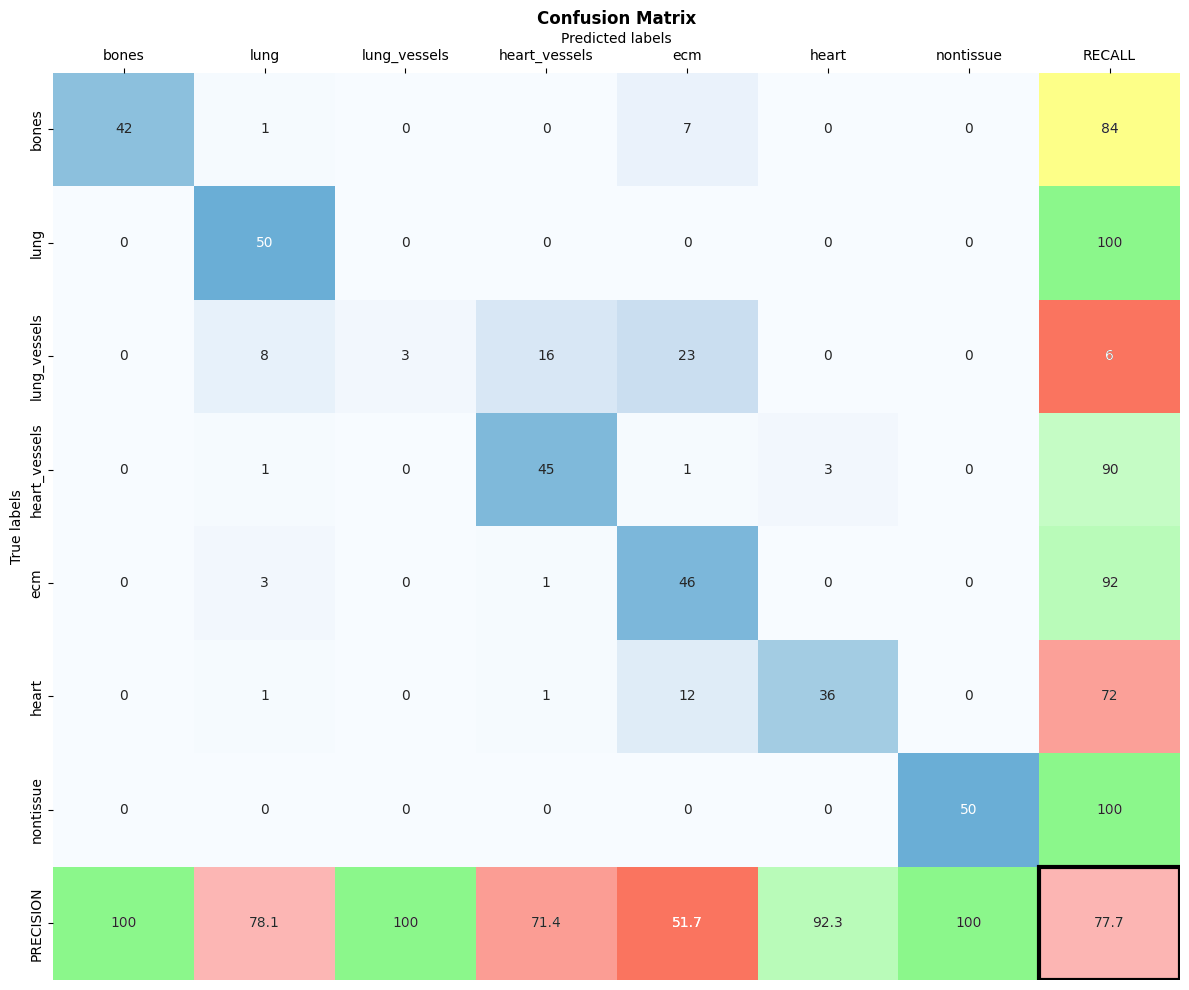


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\Jaime\annotate\12_14_2024\confusion_matrixDeepLabV3_plus.png
Overall Accuracy: 77.7%


In [8]:
# 5 Test model
print(' ')
if resolution == 'Custom':
    if downsamp_annotated:
        WSI2tif(pthtest, resolution, umpix, test_img_type, scale, pthtest)
        if not os.path.isfile(os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl')):
            try:
                os.makedirs(os.path.join(pthtestim, 'TA'), exist_ok=True)
                shutil.copy(os.path.join(pthim, 'TA', 'TA_cutoff.pkl'),
                            os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl'))
            except:
                print('No TA cutoff file found, using default value')
    else:
        if already_scaled:
            if not os.path.isfile(os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl')):
                try:
                    os.makedirs(os.path.join(pthtestim, 'TA'), exist_ok=True)
                    shutil.copy(os.path.join(pthim, 'TA', 'TA_cutoff.pkl'),
                                 os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl'))
                except:
                    print('No TA cutoff file found, using default value')
        if not already_scaled: # Additional function i accidentally added, might include it in the future
            WSI2tif(uncomp_test_pth, resolution, umpix, train_img_type, scale, pthtest)
            if not os.path.isfile(os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl')):
                try:
                    os.makedirs(os.path.join(pthtestim, 'TA'), exist_ok=True)
                    shutil.copy(os.path.join(pthim, 'TA', 'TA_cutoff.pkl'),
                                os.path.join(pthtestim, 'TA', 'TA_cutoff.pkl'))
                except:
                    print('No TA cutoff file found, using default value')
else:
    WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL, pthtest, pthtestim)

In [9]:
# 6 Classify images with pretrained model
classify_images(pthim, pthDL, model_type)

   
MRI_slice_1585.tif
Starting classification of image 1 of 19: MRI_slice_1585.tif
  Image MRI_slice_1585.tif already classified by this model
MRI_slice_1627.tif
Starting classification of image 2 of 19: MRI_slice_1627.tif
  Image MRI_slice_1627.tif already classified by this model
MRI_slice_1670.tif
Starting classification of image 3 of 19: MRI_slice_1670.tif
  Image MRI_slice_1670.tif already classified by this model
MRI_slice_1712.tif
Starting classification of image 4 of 19: MRI_slice_1712.tif
  Image MRI_slice_1712.tif already classified by this model
MRI_slice_1737.tif
Starting classification of image 5 of 19: MRI_slice_1737.tif
  Image MRI_slice_1737.tif already classified by this model
MRI_slice_1744.tif
Starting classification of image 6 of 19: MRI_slice_1744.tif
  Image MRI_slice_1744.tif already classified by this model
MRI_slice_1754.tif
Starting classification of image 7 of 19: MRI_slice_1754.tif
  Image MRI_slice_1754.tif already classified by this model
MRI_slice_1839.t

'//10.99.68.52/Kiemendata/Valentina Matos/Jaime/annotate/Test_2.0\\classification_12_14_2024_DeepLabV3_plus'

In [10]:
# 7 Quantify images
quantify_images(pthDL, pthim)

Quantifying images...
Image 1 / 19: MRI_slice_1585.tif
Image 2 / 19: MRI_slice_1627.tif
Image 3 / 19: MRI_slice_1670.tif
Image 4 / 19: MRI_slice_1712.tif
Image 5 / 19: MRI_slice_1737.tif
Image 6 / 19: MRI_slice_1744.tif
Image 7 / 19: MRI_slice_1754.tif
Image 8 / 19: MRI_slice_1839.tif
Image 9 / 19: MRI_slice_1881.tif
Image 10 / 19: MRI_slice_1924.tif
Image 11 / 19: MRI_slice_1934.tif
Image 12 / 19: MRI_slice_1939.tif
Image 13 / 19: MRI_slice_1958.tif
Image 14 / 19: MRI_slice_1963.tif
Image 15 / 19: MRI_slice_1966.tif
Image 16 / 19: MRI_slice_1974.tif
Image 17 / 19: MRI_slice_1979.tif
Image 18 / 19: MRI_slice_1984.tif
Image 19 / 19: MRI_slice_1985.tif


In [11]:
# 8 Object count analysis if annotation classes were selected
pickle_path = os.path.join(pthDL, 'net.pkl')
with open(pickle_path, 'rb') as f:
    data = pickle.load(f)
final_df = data['final_df']
model_name = data['nm']
classNames = data['classNames']
quantpath = os.path.join(pthim, 'classification_'+model_name+'_'+model_type)

# Identify annotation classes for component analysis
tissues = []
count = 0
print(final_df)
for index, row in final_df.iterrows():
    if final_df['Delete layer'][index]:
        count += 1
    if row['Component analysis']:
        tissues.append(final_df['Combined layers'][index]-count)
tissues = list(set(tissues))

# Check if the tissue list has elements
for tissue in tissues:
    if not os.path.isfile(os.path.join(quantpath, classNames[tissue-1]+'_count_analysis.csv')):
        # Call the quantify_objects function
        quantify_objects(pthDL, quantpath, tissue)
    else:
        print(f'Object quantification already done for {classNames[tissue-1]}')

      Layer Name            Color Whitespace Settings  Delete layer  \
0          bones  (250, 236, 154)                   2         False   
1           lung     (0, 255, 64)                   2         False   
2   lung_vessels    (255, 128, 0)                   2         False   
3  heart_vessels      (255, 0, 0)                   2         False   
4            ecm  (255, 128, 192)                   2         False   
5          heart  (255, 255, 255)                   2         False   
6      nontissue    (0, 255, 255)                   2         False   

   Combined layers  Nesting  Component analysis  
0                1        1               False  
1                2        2               False  
2                3        3               False  
3                4        4               False  
4                5        5               False  
5                6        6               False  
6                7        7               False  


In [14]:
output_path = os.path.join(pthDL, model_type+ 'evaluation_report.pdf')
confusion_matrix_path = os.path.join(pthDL, 'confusion_matrix_'+model_type+'.png')
color_legend_path = os.path.join(pthDL, 'model_color_legend.jpg')
check_annotations_path = os.path.join(pth, 'check_annotations')
check_quant = os.path.join(quantpath, 'image_quantifications.csv')
check_classification_path = os.path.join(pthim, 'classification_' + model_name + '_' + model_type,
                                                     'check_classification')
create_output_pdf(output_path, pthDL, confusion_matrix_path, color_legend_path, check_annotations_path,
                      check_classification_path, check_quant)

Generating model evaluation report...
PDF report saved at: \\10.99.68.52\Kiemendata\Valentina Matos\Jaime\annotate\12_14_2024\DeepLabV3_plusevaluation_report.pdf


In [3]:

#read all image names into a datafreame
import pandas as pd
import os
import glob

pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\LG HG PanIN project\LGHG segmentation'
extensions = ['*.ndpi', '*.svs']
imlist = []
for ext in extensions:
    imlist.extend(glob.glob(os.path.join(pth, ext)))
imnames = [os.path.basename(im) for im in imlist]
df = pd.DataFrame(imnames, columns=['Image name'])
df


,Image name
0,AB_04_0001.ndpi
1,AB_04_0226.ndpi
2,AB_04_0305.ndpi
3,AB_04_0451.ndpi
4,AB_04_0530.ndpi
...,...
111,TC_037_0370.svs
112,TC_057_0570.svs
113,TC_062_1180.svs
114,TC_065_0320.svs
